# Robot boxes domain analysis - RRT-Plan vs A* with hADD heuristic

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_rrt = pd.read_csv('RRT_Plan_Robot_Boxes _RRT_PLAN.csv')
df_rrt.head()

,problem,solution_length,time_seconds
0,1,3,0.0036
1,2,5,0.0204
2,3,9,0.0664
3,4,15,0.1893
4,5,15,0.4520


In [3]:
df_astar = pd.read_csv('RRT_Plan_Robot_Boxes_ASTAR_hADD.csv')

In [4]:
df_astar.head()

,problem,solution_length,time_seconds
0,1,3.0,0.0026
1,2,5.0,0.0123
2,3,9.0,0.0476
3,4,13.0,0.2803
4,5,17.0,1.0306


### Time x Problem Complexity

In [5]:
x = df_rrt['problem'].values

In [6]:
rrt_y = df_rrt['time_seconds'].values

In [7]:
astar_y = df_astar['time_seconds'].values

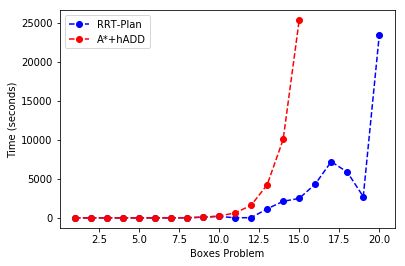

In [8]:
plt.plot(x, rrt_y, 'bo--', x, astar_y, 'ro--')
plt.legend(['RRT-Plan', 'A*+hADD'])
plt.xlabel('Boxes Problem')
plt.ylabel('Time (seconds)')
plt.show()

### Solution Length x Problem Complexity

In [9]:
optimal_solution = np.array([3,5,9,11,15,17,21,23,27,29,33,35,39,41,45,47,51,53,57,59])

In [10]:
rrt_y = df_rrt['solution_length'].values
astar_y = df_astar['solution_length'].values

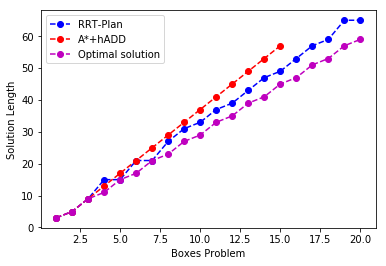

In [11]:
plt.plot(x, rrt_y, 'bo--', x, astar_y, 'ro--', x, optimal_solution, 'mo--')
plt.legend(['RRT-Plan', 'A*+hADD','Optimal solution'])
plt.xlabel('Boxes Problem')
plt.ylabel('Solution Length')
plt.show()

### Individual time analysis

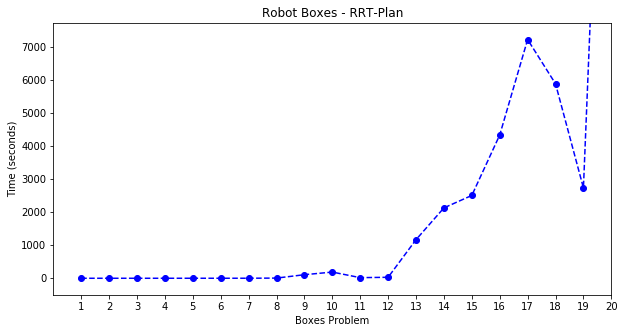

In [12]:
rrt_time = df_rrt['time_seconds'].values
plt.figure(figsize=(10,5))
plt.title('Robot Boxes - RRT-Plan')
axis_values = [0, 20, -500, max(rrt_time[:-1])+500] # xmin, xmax, ymin, ymax
plt.axis(axis_values)
plt.plot(x, rrt_time, 'bo--')
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.xlabel('Boxes Problem')
plt.ylabel('Time (seconds)')
plt.show()

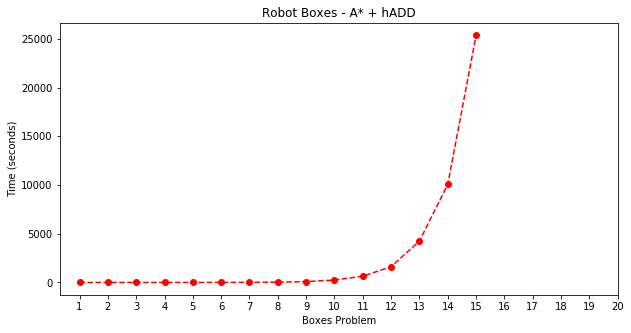

In [13]:
# retirando o último data point para o problema 20 que estava destoando muito
astar_time = df_astar['time_seconds'].values
plt.figure(figsize=(10,5))
plt.title('Robot Boxes - A* + hADD')
plt.plot(x[:astar_time.shape[0]], astar_time, 'ro--')
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.xlabel('Boxes Problem')
plt.ylabel('Time (seconds)')
plt.show()